#### Introduction to Statistical Learning, Exercise 4.1

__Please do yourself a favour and only look at the solutions after you honestly tried to solve the exercises.__

# Classification on the Weekly Data Set

This data set is very similar to the `Smarket` data set, except that it contains 1,089 observations of *weekly* returns for 21 years, from the beginning of 1990 to the end of 2010.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import patsy
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from islpy import datasets, utils, lmplots
sns.set()
%matplotlib inline

### A. Visualisation

Produce some numerical and graphical summaries of the `Weekly` data set.

Do there appear to be any patterns?

In [4]:
weekly = datasets.Weekly()
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [6]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


The distributions of the `Lag` variables are all similar, and so is the `Today` distribution. There is nothing obvious to conclude from the numerical summary.

We dare to make a pair plot matrix, this may take take a while...

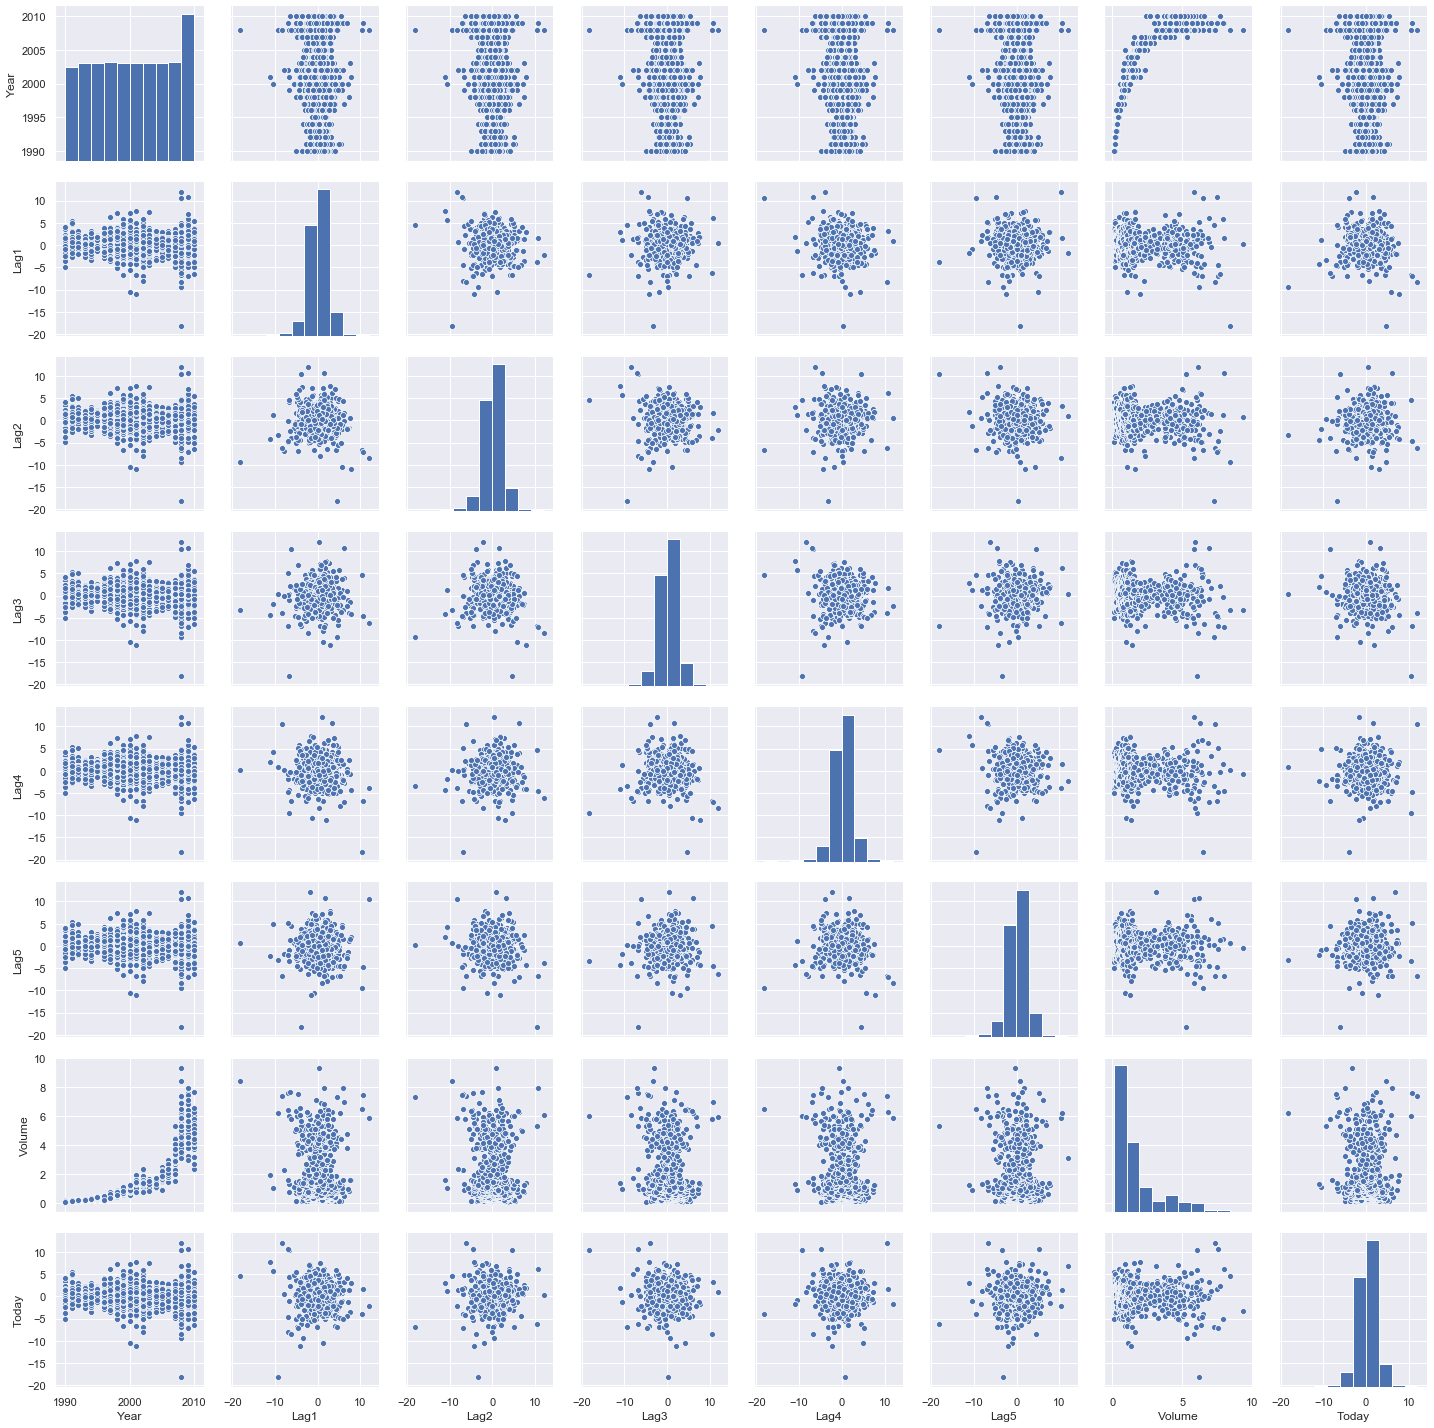

In [7]:
sns.pairplot(data=weekly)
plt.show()

Comments:

  - Some plots *do* show some structure.
  - Clearly `Volume` increased over time.
  - In general, `Volume` has more interesting correlation structures than the `Lag` variables.

### B. Logistic Regression

Use the full data set to perform a logistic regression with `Direction` as the response and the five lag variables (`Lag1` through `Lag5`) and `Volume` as predictors. Do any of the predictors seem to be significant?

In [11]:
logit_fit = smf.glm('Direction~Lag1+Lag2+Lag3+Lag4+Lag5+Volume',
                    weekly, family=sm.families.Binomial()).fit()
logit_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1089
Model:                                              GLM   Df Residuals:                     1082
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                          1.0000
Method:                                            IRLS   Log-Likelihood:                -743.18
Date:                                  Mon, 18 Nov 2019   Deviance:                       1486.4
Time:                                          00:21:53   Pearson chi2:                 1.09e+03
No. Iterations:                                       4                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2669      0.086     -3.106      0.002      -0.435      -0.098
Lag1           0.0413      0.026      1.563      0.118      -0.010       0.093
Lag2          -0.0584      0.027     -2.175      0.030      -0.111      -0.006
Lag3           0.0161      0.027      0.602      0.547      -0.036       0.068
Lag4           0.0278      0.026      1.050      0.294      -0.024       0.080
Lag5           0.0145      0.026      0.549      0.583      -0.037       0.066
Volume         0.0227      0.037      0.616      0.538      -0.050       0.095
==============================================================================
"""

According the (rather generous) $p < 0.05$ criterion, the `Lag1` and `Lag2` variables seem to have a significant influence on the response. We would not bet any money on this, though.